In [1]:
import sklearn
import xgboost as xgb
import catboost
import lightgbm
import tsfresh
from sklearn.model_selection import train_test_split
import numpy as np


/opt/anaconda3/lib/python3.7/site-packages/lightgbm/__init__.py:48: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.3) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


In [2]:
import pandas as pd

In [3]:
from matplotlib import pyplot as plt

In [4]:
df = pd.read_csv('train_small.csv',header = None, index_col=0)
dt = pd.read_csv('test_small.csv', index_col=0)

newcolnames = ["var_{}".format(i) for i in range(200)]
newcolnames.insert(0,"target")

df.columns = newcolnames

In [5]:
X0 = df[ df["target"] == 0]
X1 = df[ df["target"] == 1]
X = df.drop("target", 1)
y = df["target"]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [7]:
d_train = xgb.DMatrix(X_train, label = y_train, missing = -1)
d_test = xgb.DMatrix(X_test)

train_labels = d_train.get_label()
ratio = float(np.sum(train_labels == 0)) / np.sum(train_labels == 1)

params = {
    'objective': 'binary:logistic',
    'silent': 1,
    'eta': 0.3,
    'max_depth': 1,
    'scale_pos_weight': ratio,
    'subsample': 0.8,
    'learning_rate': 0.3,
    'colsample_bytree': 0.5,
    'gamma': 1
}
num_round = 81

/opt/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


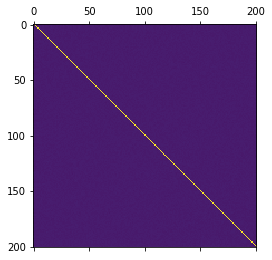

In [8]:
plt.matshow(df.corr())
plt.show()

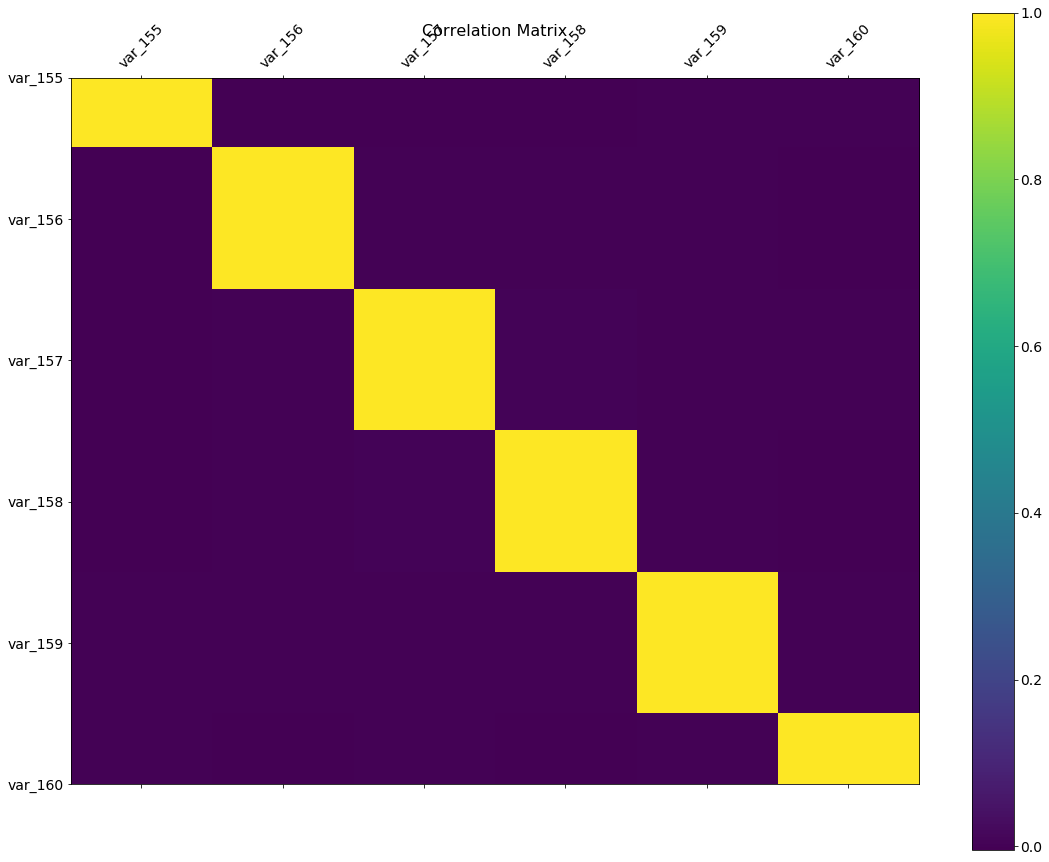

In [9]:

df2 = df[['var_155','var_156','var_157','var_158','var_159','var_160']]
f = plt.figure(figsize=(19, 15))
plt.matshow(df2.corr(), fignum=f.number)
plt.xticks(range(df2.shape[1]), df2.columns, fontsize=14, rotation=45)
plt.yticks(range(df2.shape[1]), df2.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

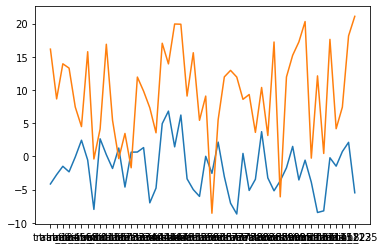

In [10]:
df2 = (df[['var_1', 'var_139']])
plt.plot(df2.head(50))

In [11]:
#noe
model = xgb.train(params,d_train,num_round)

#noe
preds = model.predict(d_test)

In [12]:
df.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,70057.000000,70057.000000,70057.000000,70057.000000,70057.000000,70057.000000,70057.000000,70057.000000,70057.000000,70057.000000,...,70057.000000,70057.000000,70057.000000,70057.000000,70057.000000,70057.000000,70057.000000,70057.000000,70057.000000,70057.000000
mean,0.099733,10.678757,-1.625370,10.718501,6.801363,11.080280,-5.099666,5.412131,16.557562,0.284365,...,3.257023,7.444208,1.927193,3.328773,18.008622,-0.140578,2.298631,8.906114,15.869843,-3.323176
std,0.299646,3.037911,4.060012,2.629766,2.043351,1.627265,7.887190,0.867160,3.422813,3.335973,...,4.540336,3.018182,1.481911,3.988392,3.138089,1.427751,5.460012,0.920043,3.014017,10.438217
min,0.000000,0.597900,-15.043400,2.615000,-0.040200,5.490200,-29.777300,2.347300,5.349700,-9.905100,...,-13.999500,-2.009400,-3.566800,-11.783400,9.594900,-4.644200,-14.020400,5.960600,6.299300,-38.852800
25%,0.000000,8.461000,-4.751700,8.742600,5.252000,9.877400,-11.271800,4.768100,13.951300,-2.335100,...,-0.022800,5.161900,0.886300,0.587800,15.640500,-1.164000,-1.956100,8.253600,13.819700,-11.236200
50%,0.000000,10.526500,-1.614100,10.589100,6.837700,11.113000,-4.844100,5.387400,16.464600,0.409100,...,3.231400,7.341700,1.899100,3.387100,17.975900,-0.169000,2.390700,8.886000,15.931700,-2.800100
75%,0.000000,12.749600,1.371600,12.505900,8.333400,12.268000,0.907600,6.005500,19.119800,2.946300,...,6.410200,9.529300,2.952300,6.206400,20.421000,0.828300,6.573400,9.589400,18.071500,4.855300
max,1.000000,20.315000,10.376800,19.353000,13.188300,16.671400,16.806500,8.447700,27.638900,9.482200,...,18.342300,16.684600,7.611600,17.908600,27.928800,4.075600,16.226600,11.843900,26.079100,27.531900


In [13]:
from sklearn.decomposition import PCA

dpca = pd.DataFrame(data=np.random.normal(0, 1, (20, 10)))

pca = PCA(n_components=5)
pca.fit(df)

PCA(copy=True, iterated_power='auto', n_components=5, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [14]:
pca.components_ 

array([[ 2.72509499e-04, -2.72790554e-04,  7.93368889e-04, ...,
         6.63591061e-05,  2.78932497e-04,  1.25597321e-03],
       [-3.97745419e-04, -1.42429679e-03, -8.64501401e-04, ...,
        -1.40800145e-04, -5.91231276e-04,  7.85667558e-03],
       [-1.62136732e-04,  1.91032505e-04,  2.94338213e-03, ...,
         1.85599092e-04,  3.97447406e-04, -1.16345824e-02],
       [-6.03208342e-04,  1.74002606e-03, -2.06752707e-04, ...,
         1.81833880e-04,  1.93434516e-04, -4.54488307e-03],
       [-2.48531091e-04,  1.99584858e-04,  5.87483099e-04, ...,
        -5.49384319e-04,  6.53232189e-04,  1.01579458e-02]])

In [15]:
plt.plot(df)


Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x1c1cc85950> (for post_execute):


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x1c1cc8f290> (for post_execute):


KeyboardInterrupt: 

In [16]:
Yt

NameError: name 'Yt' is not defined

In [ ]:
%matplotlib inline
from matplotlib import pyplot
from matplotlib.pylab import rcParams
rcParams.update({'font.size': 22})
rcParams['figure.figsize'] = 15,10

xgb.plot_importance(model,max_num_features=15)
pyplot.show()